In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/breast canser/breast-cancer-wisconsin.names
/kaggle/input/breast-cancer/breast canser/breast-cancer-wisconsin.data


#  # importing Dataset

In [5]:
data = pd.read_csv('/kaggle/input/breast-cancer/breast canser/breast-cancer-wisconsin.data'
,names = [
    'Sample code number',
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses',
    'Class'
])

date.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
data.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

# # Preprocessing

In [8]:
def is_non_numrix(x):
    return not x.isnumeric()

In [9]:
mask = data['Bare Nuclei'].apply(is_non_numrix)
data_non_numeric = data[mask]
data_non_numeric.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2


In [12]:
data_numeric = data[~mask]

In [13]:
print(len(data))
print(len(data_numeric))

699
683


In [14]:
data_numeric.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [15]:
data_numeric['Bare Nuclei'] = data_numeric['Bare Nuclei'].astype('int64')

/tmp/ipykernel_32/1266938030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['Bare Nuclei'] = data_numeric['Bare Nuclei'].astype('int64')


In [16]:
data_input = data_numeric.drop(columns = ['Sample code number','Class'])
data_output = data_numeric['Class']

In [17]:
data_input.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [18]:
data_output.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

# # Spliting data

In [21]:
from sklearn.model_selection import train_test_split
x,x_test, y,  y_test = train_test_split(data_input, data_output, test_size=1/3, random_state=2)

x_train,x_val, y_train,  y_val = train_test_split(x, y, test_size=1/3, random_state=2)

# # Trainig Model by DT
 

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3,random_state = 2)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [23]:
y_pred_train =model.predict(x_train)
y_pred_val =model.predict(x_val)

In [24]:
from sklearn.metrics import  accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_val,y_pred_val))

0.9867986798679867
0.9671052631578947


# # Choose Best Max_depth

In [25]:
max_depth_values = [1,2,3,4,5,6,7,8]
train_accuracy_values =[]
val_accuracy_values = []
for max_depth_val in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth_val,random_state = 2)
    model.fit(x_train, y_train)
    y_pred_train =model.predict(x_train)
    y_pred_val =model.predict(x_val)
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_val=accuracy_score(y_val,y_pred_val)
    train_accuracy_values.append(acc_train)
    val_accuracy_values.append(acc_val)

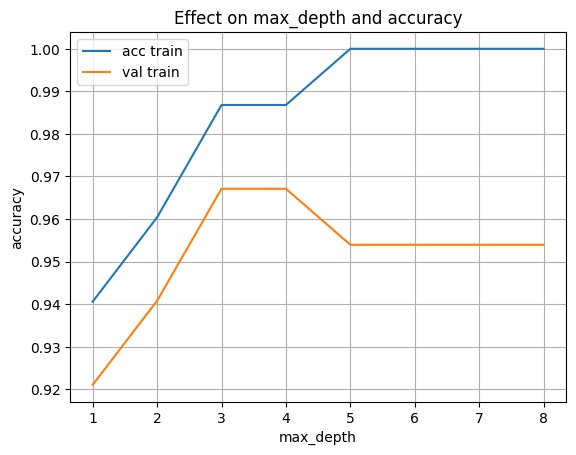

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.plot(max_depth_values,train_accuracy_values,label = 'acc train')
plt.plot(max_depth_values,val_accuracy_values,label = 'val train')
plt.legend()
plt.grid(axis='both')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Effect on max_depth and accuracy')
plt.show()

In [28]:
final_model = DecisionTreeClassifier(max_depth=3,random_state = 0)
final_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [29]:
y_pred_test = final_model.predict(x_test)
print(accuracy_score(y_test,y_pred_test))

0.9473684210526315


# # feature_importances

In [31]:
final_model.feature_importances_

array([0.02995471, 0.00298105, 0.80592766, 0.01521893, 0.08542603,
       0.06049163, 0.        , 0.        , 0.        ])

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

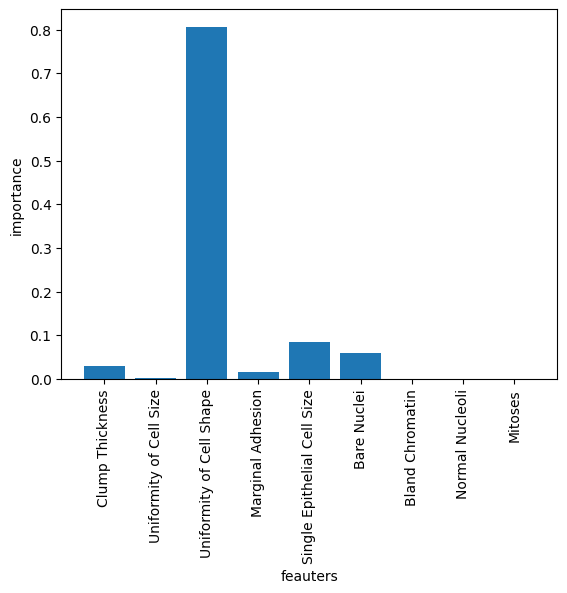

In [32]:
feature_names=[
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses'
    ]
plt.bar(feature_names,final_model.feature_importances_)
plt.xlabel('feauters')
plt.xticks(rotation=90)
plt.ylabel('importance')

plt

# # Model evaluation

In [33]:
from sklearn.metrics import confusion_matrix

# predict on test data
y_pred_test = final_model.predict(x_test)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# print confusion matrix
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[127  12]
 [  0  89]]


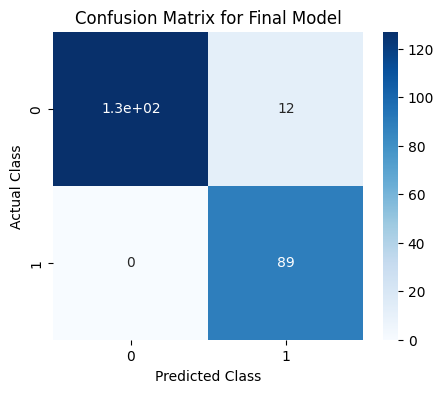

In [34]:
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Final Model')
plt.show()

In [41]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_test)

accuracy = accuracy_score(y_test, y_pred_test)
precision = cm[1,1]/(cm[0,1]+cm[1,1])
recall = cm[1,1]/(cm[1,0]+cm[1,1])
f1_score = 2*precision*recall/(precision+recall)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('Classification Report:\n', report)

Accuracy: 0.9473684210526315
Precision: 0.8811881188118812
Recall: 1.0
F1 Score: 0.9368421052631579
Classification Report:
               precision    recall  f1-score   support

           2       1.00      0.91      0.95       139
           4       0.88      1.00      0.94        89

    accuracy                           0.95       228
   macro avg       0.94      0.96      0.95       228
weighted avg       0.95      0.95      0.95       228

